In [1]:
!pip install tables

In [2]:
import os
import requests
import pandas as pd
#df = pd.read_csv('/home/will/notebooks/usage_data/cmg/2020-04-19__2020-04-26/Fire-MainService.raw.2020-04-19__2020-04-26.csv')

def add_time_cols(df):
    '''
    Returns a dataframe with added columns describing the time of each measurement.
    
    df     input dataframe
    '''
    df.loc[:,'hr'] = df.index.map(lambda d: d.timetuple().tm_hour)    
    df.loc[:,'month'] = df.index.map(lambda d: d.timetuple().tm_mon)
    df.loc[:,'year'] = df.index.map(lambda d: d.timetuple().tm_year)
    df.loc[:,'mday'] = df.index.map(lambda d: d.timetuple().tm_mday)
    df.loc[:,'yday'] = df.index.map(lambda d: d.timetuple().tm_yday)
    df.loc[:,'yrmonth'] = df['year']*100 + df['month']
    df.loc[:,'yryday'] = df['year']*1000 + df['yday']
    return df

def process_df(df):
    #df =df.set_index(pd.to_datetime(df.ts))
    #del df['ts']
    #df.columns = ['usage']
    return add_time_cols(df)

def load_df(key, hdf='dataset.h5'):
    df = pd.read_hdf(hdf, key=key, mode='r+')
    return process_df(df)

def see_available_datasets(hdf='dataset.h5'):
    store = pd.HDFStore(hdf)
    return store.keys()

def download_dataset(url='https://wtgtemp.s3.amazonaws.com/dataset.h5', hdf='dataset.h5', force=False):
    if os.path.exists(hdf):
        print("Dataset already exists.  Skipping.  Rename or delete the file to download again")
        return False
    print("Downloading...")
    resp = requests.get(url)
    with open(hdf, 'wb') as f:
        f.write(resp.content)

Some functions Ive found generally useful for slicing and dicing

In [3]:
#retrievers ====================
def get_item(df, name, value):
    '''
    Returns a subsection of the dataframe df constituted by all rows corresponding to an arbitrary column value
    
    df:        dataframe input
    name:      name of the column whose value is being examined. (Ex: "year")
    value:     column value whose rows will be included in the returned dataframe. (Ex: "2018")
    '''
    return df.ix[df[name]==value]

def get_day(df, yryday):
    '''
    Returns the subsection of the dataframe df corresponding to yryday
    
    df:          dataframe input
    yrmonth:     year and day (in "year_yday" format, ex: 201842 for 2/11) whose subsection is returned
    '''
    return get_item(df, 'yryday', yryday)

def get_month(df, yrmonth):
    '''
    Returns the subsection of the dataframe df corresponding to yrmonth
    
    df:          dataframe input
    yrmonth:     year and month (in "year_month" format, ex: 201803 for 3/2018) whose subsection is returned
    '''
    return get_item(df, 'yrmonth', yrmonth)

#iterators ==================
def get_list_dfs(df, name):
    '''
    Decomposes an input dataframe into separate dataframes, each with rows corresponding to a unique value on a specified column.
    
    df:      input dataframe
    name:    column whose values are examined
    
    '''
    return [df.ix[df[name]==value] for value in df[name].unique()]

def month_dfs(df):
    '''
    Returns a list of dfs, one for each month
    '''
    #return [df.ix[df.yrmonth==yrmonth] for yrmonth in df.yrmonth.unique()]
    return get_list_dfs(df, 'yrmonth')

def day_dfs(df):
    '''
    Returns a list of dfs, one for each day.
    '''
    return get_list_dfs(df, 'yryday')


In [4]:
download_dataset()
see_available_datasets()

Dataset already exists.  Skipping.  Rename or delete the file to download again


['/cmg/BofED-Admin',
 '/cmg/CHS-EmergencyService',
 '/cmg/CHS-MainService',
 '/cmg/CNH-MainService',
 '/cmg/Fire-MainService',
 '/cmg/OH-FrontBldg1',
 '/cmg/OH-FrontBldg2',
 '/cmg/OH-FrontBldg3',
 '/cmg/OH-FrontBldg4',
 '/cmg/OH-FrontCommCtr',
 '/cmg/OH-RearBldg1',
 '/cmg/OH-RearBldg2',
 '/cmg/OH-RearBldg3',
 '/cmg/OH-RearBldg4',
 '/cmg/OH-RearCommCtr',
 '/cmg/Police-MainService',
 '/cmg/TH-AnnexRadioTower',
 '/cmg/TH-MainService']

In [5]:
df = load_df('/cmg/BofED-Admin')\

In [13]:
df.iloc[0]['usage']

0.59184

In [6]:
df['ts'] = df.index

In [26]:
import plotly.express as px

fig = px.line(df, x='ts', y='usage')
fig.show()

ImportError: cannot import name 'qualitative'

In [8]:
import matplotlib.pyplot as plt

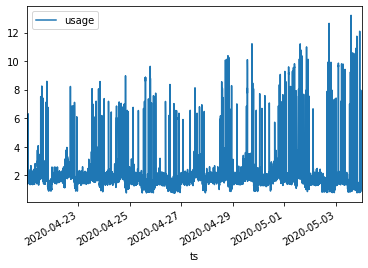

In [9]:
# gca stands for 'get current axis'
ax = plt.gca()

last_month_df = df[df.ts>'2020-04-21']


last_month_df.plot(kind='line',x='ts',y='usage',ax=ax)


plt.show()

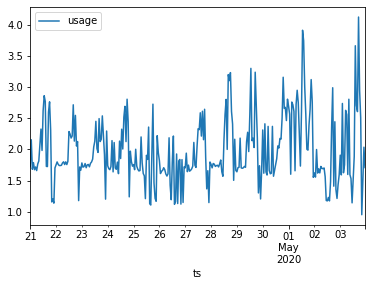

In [10]:
ax = plt.gca()
resampled_last_month = last_month_df.resample('60T').mean()
resampled_last_month['ts'] = resampled_last_month.index
resampled_last_month.plot(kind='line',x='ts',y='usage',ax=ax)
plt.show()

In [42]:
resampled_last_month[0:5]

,usage,hr,month,year,mday,yday,yrmonth,yryday,ts
ts,,,,,,,,,
2020-04-21 00:00:00,1.72439,0,4,2020,21,112,202004,2020112,2020-04-21 00:00:00
2020-04-21 01:00:00,2.15613,1,4,2020,21,112,202004,2020112,2020-04-21 01:00:00
2020-04-21 02:00:00,1.68158,2,4,2020,21,112,202004,2020112,2020-04-21 02:00:00
2020-04-21 03:00:00,1.78826,3,4,2020,21,112,202004,2020112,2020-04-21 03:00:00
2020-04-21 04:00:00,1.67410,4,4,2020,21,112,202004,2020112,2020-04-21 04:00:00


In [15]:
train = resampled_last_month['usage']

In [45]:
from statsmodels.tsa.stattools import adfuller
adf, pvalue, usedlag_, nobs_, critical_values_, icbest_ = adfuller(resampled_last_month['usage'])
print(pvalue)

2.638698971842433e-12


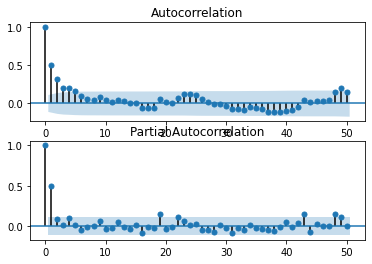

In [12]:
import statsmodels.api as sm

fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(resampled_last_month['usage'], lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(resampled_last_month['usage'], lags=50, ax=ax[1])
plt.show()

Optimization terminated successfully.
         Current function value: 0.795890
         Iterations: 3
         Function evaluations: 141


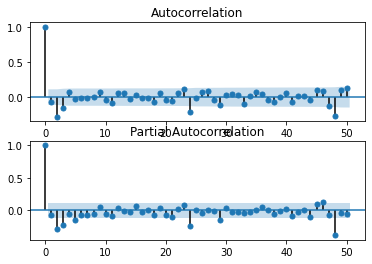

In [13]:
model = sm.tsa.statespace.SARIMAX(
    resampled_last_month['usage'], 
    order=(1,1,0), 
    seasonal_order=(1,1,0,24)
).fit(max_iter=50, method='powell')

res = model.resid
fig, ax = plt.subplots(2,1)
fig = sm.graphics.tsa.plot_acf(res, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=50, ax=ax[1])
plt.show()

In [ ]:
import itertools
#set parameter range
p = range(1,3)
q = range(1,3)
d = range(0,2)
s = range(24,49,6)
# list of all parameter combos
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(p, d, q, s))
# SARIMA model pipeline
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(
                                    train,
                                    order=param,
                                    seasonal_order=param_seasonal)
            results = mod.fit(max_iter = 50, method = 'powell')
            print('SARIMA{},{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Optimization terminated successfully.
         Current function value: 0.632465
         Iterations: 7
         Function evaluations: 439
SARIMA(1, 0, 1),(1, 0, 1, 24) - AIC:404.6582987233693
Optimization terminated successfully.
         Current function value: 0.677059
         Iterations: 5
         Function evaluations: 327
SARIMA(1, 0, 1),(1, 0, 1, 30) - AIC:432.4849448203555
Optimization terminated successfully.
         Current function value: 0.663487
         Iterations: 3
         Function evaluations: 193
SARIMA(1, 0, 1),(1, 0, 1, 36) - AIC:424.01582840165486


/code/venvs/venv/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:1006: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



Optimization terminated successfully.
         Current function value: 0.680509
         Iterations: 7
         Function evaluations: 443
SARIMA(1, 0, 1),(1, 0, 1, 42) - AIC:434.63732927935234


/code/venvs/venv/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:994: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.



Optimization terminated successfully.
         Current function value: 0.643121
         Iterations: 13
         Function evaluations: 876
SARIMA(1, 0, 1),(1, 0, 1, 48) - AIC:411.3074900535293
Optimization terminated successfully.
         Current function value: 0.630483
         Iterations: 5
         Function evaluations: 437
SARIMA(1, 0, 1),(1, 0, 2, 24) - AIC:405.42108858326304
Optimization terminated successfully.
         Current function value: 0.675846
         Iterations: 5
         Function evaluations: 383
SARIMA(1, 0, 1),(1, 0, 2, 30) - AIC:433.72776329363097
Optimization terminated successfully.
         Current function value: 0.632979
         Iterations: 9
         Function evaluations: 708
SARIMA(1, 0, 1),(1, 0, 2, 48) - AIC:406.97900183322304
Optimization terminated successfully.
         Current function value: 0.600713
         Iterations: 5
         Function evaluations: 325
SARIMA(1, 0, 1),(1, 1, 1, 24) - AIC:384.8447244498884
Optimization terminated successfully

/code/venvs/venv/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning:

Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.



Optimization terminated successfully.
         Current function value: 0.653422
         Iterations: 4
         Function evaluations: 306
SARIMA(1, 0, 1),(2, 0, 1, 36) - AIC:419.73538006407585
Optimization terminated successfully.
         Current function value: 0.634544
         Iterations: 5
         Function evaluations: 371
SARIMA(1, 0, 1),(2, 0, 1, 48) - AIC:407.95531872121643


In [16]:
train.shape

(312,)

In [35]:
from IPython.core.debugger import set_trace

# data = entire dataset
# n_test = point where data is split into training and test sets
def walk_forward_validation(data, n_test):
    predictions = np.array([])
    mape_list = []
    train, test = data[:n_test], data[n_test:]
#     day_list = [7,14,21,28] # weeks 1,2,3,4
    hour_list = range(24, 169, 24)
    
    for i in hour_list:
        # Fit model to training data
        model = sm.tsa.statespace.SARIMAX(
            train, 
            order=(1,1,0), 
            seasonal_order=(1,1,0,24)
        ).fit(max_iter = 50, method = 'powell')
        
        # Forecast hours loads for day i
        forecast = model.get_forecast(steps = 24)
        set_trace()
        predictions = np.concatenate((predictions, forecast.predicted_mean), axis=None)
        # Calculate MAPE and add to mape_list
        j = i-24
        mape_score = (abs(test[j:i]-predictions[j:i])/test[j:i])*100
        mape_mean = mape_score.mean()
        mape_list.append(mape_mean)
        # Add week i to training data for next loop
        train = np.concatenate((train, test[j:i]), axis=None)
    
    return predictions, mape_list

In [36]:
import numpy as np

predictions, mape_list = walk_forward_validation(train, 24)

/code/venvs/venv/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
/code/venvs/venv/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 1
         Function evaluations: 37
> <ipython-input-35-96d6ba03e62a>(23)walk_forward_validation()
     21         forecast = model.get_forecast(steps = 24)
     22         set_trace()
---> 23         predictions = np.concatenate((predictions, forecast.predicted_mean), axis=None)
     24         # Calculate MAPE and add to mape_list
     25         j = i-24

ipdb> forecast.predicted_mean.shape
(24,)
ipdb> predictions
array([], dtype=float64)
ipdb> c
Optimization terminated successfully.
         Current function value: 0.369715
         Iterations: 6
         Function evaluations: 260
> <ipython-input-35-96d6ba03e62a>(22)walk_forward_validation()
     20         # Forecast hours loads for day i
     21         forecast = model.get_forecast(steps = 24)
---> 22         set_trace()
     23         predictions = np.concatenate((predictions, forecast.predicted_mean), axis=None)
     24     

ipdb> predictions.shape
(144,)
ipdb> c


In [32]:
print(predictionsb)
print(mape_list)

[2.5651378  2.9972793  2.5224122  2.62937349 2.51495605 2.55904222
 2.50064176 2.60648345 2.65531888 2.90740273 3.16835334 2.82505385
 3.46087474 3.70567085 3.61169248 2.56835314 2.56585309 3.44000253
 3.60688806 3.15063973 1.99712775 2.04325202 1.9770533  2.54396055
 2.06365261 1.76346577 2.08934308 1.96200129 2.05628032 2.02663816
 2.14205902 2.09026806 1.97215883 1.84815117 1.5607033  1.93004959
 2.28268742 2.0161856  1.97416546 2.86783242 3.77379994 2.02329999
 2.63400768 2.11155482 3.1639257  1.41716529 2.44424777 1.89858731
 1.82659942 2.09041827 1.92059457 2.05309243 1.94448688 2.01286246
 2.00781619 1.98731029 2.02354343 2.05130536 2.08221063 2.2555511
 2.40661477 2.67312925 2.29210698 2.2435346  2.78121029 2.37965314
 2.47284853 2.71811718 2.46369014 2.05458266 1.53018846 2.45271892
 1.77629144 1.5557237  1.62800655 1.64077384 1.89184869 1.58872034
 1.88808979 1.61716885 1.62649712 1.70651787 1.608462   2.00698443
 1.86840916 2.28298661 1.91945318 2.21372023 2.52825721 2.03583

In [34]:
predictions.shape

(168,)

In [37]:
train.shape

(312,)

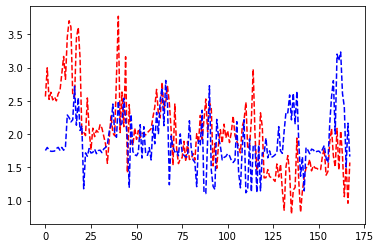

In [41]:
# evenly sampled time at 200ms intervals
t = np.arange(0, 168)

# red dashes, blue squares and green triangles
plt.plot(t, predictions, 'r--', t, train[24:192], 'b--')
plt.show()